In [116]:
import numpy as np
import pandas as pd
import datetime
import random
import math
# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

cwd = os.getcwd()
print(cwd)


import gc

gc.enable()

from bokeh.io import output_notebook, show
from bokeh.models import (
    BasicTicker,
    ColorBar,
    ColumnDataSource,
    LinearColorMapper,
    PrintfTickFormatter,
)
from bokeh.plotting import figure
from bokeh.transform import transform


random_state = 55

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

C:\Users\user\Downloads\BUSA8031


In [117]:
df = pd.read_excel("heart attack.xlsx", sheet_name="heart")

In [118]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,NaN,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [119]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57.0,0.0,0,140,241,0,1,123.0,1,0.2,1,0,3,0
299,45.0,1.0,3,110,264,0,1,132.0,0,1.2,1,0,3,0
300,68.0,1.0,0,144,193,1,1,141.0,0,3.4,1,2,3,0
301,57.0,1.0,0,130,131,0,1,115.0,1,1.2,1,1,3,0
302,57.0,0.0,1,130,236,0,0,174.0,0,0.0,1,1,2,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       291 non-null    float64
 1   sex       298 non-null    float64
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  293 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [121]:
df.describe(include = "all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,291.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,293.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.463918,0.684564,0.966997,131.623762,246.264026,0.148515,0.528053,149.501706,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,8.909966,0.465471,1.032052,17.538143,51.830751,0.356198,0.525860,23.049920,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [122]:
categorical_data, numerical_data = [],[]
for a in df.columns:
    b=df.dtypes[a]
    if b == 'object':
        categorical_data.append(a)
    else:
        numerical_data.append(a)

print('Categorical_data:\n {}'.format(categorical_data))
print('Categorical features count: {}'.format(len(categorical_data)))
print('\nNumerical_data:\n {}'.format(numerical_data))
print('Numerical features count: {}'.format(len(numerical_data)))

Categorical_data:
 []
Categorical features count: 0

Numerical_data:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
Numerical features count: 14


In [123]:
nulls = df.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
age,12,0.039604
thalachh,10,0.033003
sex,5,0.016502
output,0,0.000000
thall,0,0.000000
caa,0,0.000000
slp,0,0.000000
oldpeak,0,0.000000
exng,0,0.000000
restecg,0,0.000000


In [124]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38.0,1.0,2,138,175,0,1,173.0,0,0.0,2,4,2,1


In [125]:
df.drop_duplicates(keep='first',inplace=True)

In [126]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [127]:
# Checking Unique Values
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


output      1.000000
cp          0.432080
thalachh    0.424578
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.218311
sex        -0.285601
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64


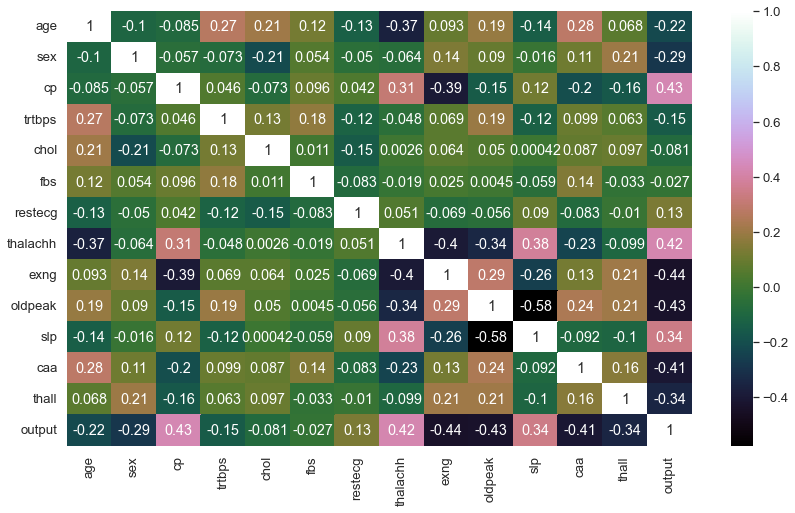

In [128]:
corr =df.corr()
corr.sort_values(['output'], ascending= False, inplace=True)
print(corr.output)
correlationmat = df.corr()
plt.figure(figsize=(14,8))
g=sns.heatmap(df.corr(),annot=True,cmap='cubehelix')

In [129]:
df_1 = pd.DataFrame(np.around(df["age"].interpolate(method = "linear")))

In [130]:
df_1.head()

,age
0,63.0
1,37.0
2,46.0
3,56.0
4,57.0


In [131]:
df = df.drop("age", axis=1)

In [132]:
df = pd.DataFrame(df)

In [133]:
df = df.join(df_1)

In [134]:
df.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1,63.0
1,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1,37.0
2,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1,46.0
3,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1,56.0
4,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1,57.0


In [135]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [136]:
df.head(40)

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1,63.0
1,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1,37.0
2,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1,46.0
3,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1,56.0
4,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1,57.0
5,1.0,0,140,192,0,1,148.0,0,0.4,1,0,1,1,57.0
6,0.0,1,140,294,0,0,153.0,0,1.3,1,0,2,1,56.0
7,1.0,1,120,263,0,1,173.0,0,0.0,2,0,3,1,44.0
8,1.0,2,172,199,1,1,162.0,0,0.5,2,0,3,1,52.0
9,1.0,2,150,168,0,1,174.0,0,1.6,2,0,2,1,57.0


In [137]:
nulls = df.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
thalachh,10,0.033113
age,0,0.000000
output,0,0.000000
thall,0,0.000000
caa,0,0.000000
slp,0,0.000000
oldpeak,0,0.000000
exng,0,0.000000
restecg,0,0.000000
fbs,0,0.000000


In [138]:
df1=df.copy()
df1.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1,63.0
1,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1,37.0
2,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1,46.0
3,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1,56.0
4,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1,57.0


In [139]:
test_data = df1[df1["thalachh"].isnull()]

In [140]:
#test_data = test_data.sample(frac=1).reset_index(drop=True)

In [141]:
df1.dropna(inplace=True)

In [142]:
a_train = df1["thalachh"]

In [143]:
#a_train = a_train.sample(frac=1).reset_index(drop=True)

In [144]:
B_train = df1.drop("thalachh",axis=1)

In [145]:
#B_train = B_train.sample(frac=1).reset_index(drop=True)

In [146]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [147]:
lr.fit(B_train,a_train)

LinearRegression()

In [148]:
lr.score(B_train,a_train)

0.37680664201939373

In [149]:
B_test = test_data.drop("thalachh",axis=1)

In [150]:
B_test

,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,output,age
10,1.0,0,140,239,0,1,0,1.2,2,0,2,1,54.0
13,1.0,3,110,211,0,0,1,1.8,1,0,2,1,64.0
21,1.0,2,130,233,0,1,1,0.4,2,0,2,1,54.0
49,0.0,0,138,234,0,0,0,0.0,2,0,2,1,53.0
71,1.0,2,94,227,0,1,1,0.0,2,1,3,1,51.0
93,0.0,1,132,288,1,0,1,0.0,2,1,2,1,54.0
111,1.0,2,150,126,1,1,0,0.2,2,1,3,1,57.0
112,0.0,2,140,313,0,1,0,0.2,2,0,3,1,64.0
113,1.0,0,110,211,0,1,0,0.0,2,0,3,1,43.0
144,0.0,2,140,197,0,2,0,1.1,1,0,2,1,76.0


In [151]:
from lightgbm import LGBMRegressor
lgbm =  LGBMRegressor()
from sklearn.ensemble import RandomForestRegressor
param_lgb = {
    "boosting_type" :['gbdt','goss','rf'],
    "num_leaves":[12,14,16,18],
    "max_depth": [-1],
    "n_estimators": [100,125,143 , 145, 165], 
    "learning_rate":[0.01,0.1,0.125]}

gsc_lgb = GridSearchCV(
        estimator = RandomForestRegressor,
        param_grid = param_lgb,
        cv=2, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [152]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegressionCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
stack = StackingCVRegressor(
    regressors=[lgbm],
    meta_regressor=Lasso(),
    random_state=random_state,
    cv=5,
    n_jobs=-1,)

In [153]:
cv=5
stack.fit(B_train, a_train)

StackingCVRegressor(meta_regressor=Lasso(), n_jobs=-1, random_state=55,
                    regressors=[LGBMRegressor()])

In [154]:
stack.score(B_train,a_train)

0.7519035247668125

In [155]:
pred = stack.predict(B_test)

In [156]:
pred

array([164.69236664, 138.61849162, 154.3736961 , 164.95627245,
       147.93038635, 155.14238771, 149.35038892, 161.66550292,
       163.31836888, 139.10341209])

In [157]:
RANDOM_SEED = 42

In [158]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


ridge = Ridge(random_state=RANDOM_SEED)
lasso = Lasso(random_state=RANDOM_SEED)
rf = RandomForestRegressor(random_state=RANDOM_SEED)

stack = StackingCVRegressor(regressors=(lasso, ridge),
                            meta_regressor=rf, 
                            random_state=RANDOM_SEED,
                            use_features_in_secondary=True)

params = {'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0]}

grid = GridSearchCV(
    estimator=stack, 
    param_grid={
        'lasso__alpha': [x/5.0 for x in range(1, 10)],
        'ridge__alpha': [x/20.0 for x in range(1, 10)],
        'meta_regressor__n_estimators': [10, 100]
    }, 
    cv=5,
    refit=True
)





In [159]:
grid.fit(B_train, a_train)

GridSearchCV(cv=5,
             estimator=StackingCVRegressor(meta_regressor=RandomForestRegressor(random_state=42),
                                           random_state=42,
                                           regressors=(Lasso(random_state=42),
                                                       Ridge(random_state=42)),
                                           use_features_in_secondary=True),
             param_grid={'lasso__alpha': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4,
                                          1.6, 1.8],
                         'meta_regressor__n_estimators': [10, 100],
                         'ridge__alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                          0.4, 0.45]})

In [160]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.117627 using {'lasso__alpha': 0.8, 'meta_regressor__n_estimators': 100, 'ridge__alpha': 0.2}


In [161]:
grid.score(B_train,a_train)

0.7937220050699092

In [162]:
pred_grid = grid.predict(B_test)

In [163]:
pred_grid

array([163.58, 133.81, 153.66, 163.46, 160.88, 158.49, 144.15, 157.35,
       167.37, 127.9 ])

## This prediction of age will be used further. http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/ (In the link Example 2 is followed)

In [164]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np



svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=5, 
                           random_state=RANDOM_SEED)

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
stack = StackingCVRegressor(regressors=(svr, lasso, rf),
                            meta_regressor=lasso,
                            random_state=RANDOM_SEED)

print('5-fold cross validation scores:\n')

for clf, label in zip([svr, lasso, rf, stack], ['SVM', 'Lasso', 
                                                'Random Forest', 
                                                'StackingCVRegressor']):
    scores = cross_val_score(clf, B_train, a_train, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

R^2 Score: 0.12 (+/- 0.11) [SVM]
R^2 Score: 0.15 (+/- 0.08) [Lasso]
R^2 Score: 0.04 (+/- 0.09) [Random Forest]
R^2 Score: 0.16 (+/- 0.06) [StackingCVRegressor]


In [165]:
rf = RandomForestRegressor(n_estimators=100, 
                           random_state=RANDOM_SEED)

In [166]:
rf.fit(B_train, a_train)

RandomForestRegressor(random_state=42)

In [167]:
rf.score(B_train,a_train)

0.8992625253066232

In [168]:
()

()

In [169]:
pred_rf = rf.predict(B_test).round()

In [170]:
pred_rf

array([164., 136., 154., 164., 154., 152., 152., 155., 162., 130.])

In [171]:
test_data

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
10,1.0,0,140,239,0,1,NaN,0,1.2,2,0,2,1,54.0
13,1.0,3,110,211,0,0,NaN,1,1.8,1,0,2,1,64.0
21,1.0,2,130,233,0,1,NaN,1,0.4,2,0,2,1,54.0
49,0.0,0,138,234,0,0,NaN,0,0.0,2,0,2,1,53.0
71,1.0,2,94,227,0,1,NaN,1,0.0,2,1,3,1,51.0
93,0.0,1,132,288,1,0,NaN,1,0.0,2,1,2,1,54.0
111,1.0,2,150,126,1,1,NaN,0,0.2,2,1,3,1,57.0
112,0.0,2,140,313,0,1,NaN,0,0.2,2,0,3,1,64.0
113,1.0,0,110,211,0,1,NaN,0,0.0,2,0,3,1,43.0
144,0.0,2,140,197,0,2,NaN,0,1.1,1,0,2,1,76.0


In [172]:
test_data.loc[test_data.thalachh.isnull(),'thalachh']=pred_rf

In [173]:
test_data

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
10,1.0,0,140,239,0,1,164.0,0,1.2,2,0,2,1,54.0
13,1.0,3,110,211,0,0,136.0,1,1.8,1,0,2,1,64.0
21,1.0,2,130,233,0,1,154.0,1,0.4,2,0,2,1,54.0
49,0.0,0,138,234,0,0,164.0,0,0.0,2,0,2,1,53.0
71,1.0,2,94,227,0,1,154.0,1,0.0,2,1,3,1,51.0
93,0.0,1,132,288,1,0,152.0,1,0.0,2,1,2,1,54.0
111,1.0,2,150,126,1,1,152.0,0,0.2,2,1,3,1,57.0
112,0.0,2,140,313,0,1,155.0,0,0.2,2,0,3,1,64.0
113,1.0,0,110,211,0,1,162.0,0,0.0,2,0,3,1,43.0
144,0.0,2,140,197,0,2,130.0,0,1.1,1,0,2,1,76.0


In [174]:
ha = [df1, test_data]

In [175]:
ha1 = pd.concat(ha)

In [176]:
ha1.tail()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
93,0.0,1,132,288,1,0,152.0,1,0.0,2,1,2,1,54.0
111,1.0,2,150,126,1,1,152.0,0,0.2,2,1,3,1,57.0
112,0.0,2,140,313,0,1,155.0,0,0.2,2,0,3,1,64.0
113,1.0,0,110,211,0,1,162.0,0,0.0,2,0,3,1,43.0
144,0.0,2,140,197,0,2,130.0,0,1.1,1,0,2,1,76.0


In [177]:
ha1 = ha1.sort_index(ascending=True)

In [178]:
ha1.head(30)

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1,63.0
1,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1,37.0
2,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1,46.0
3,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1,56.0
4,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1,57.0
5,1.0,0,140,192,0,1,148.0,0,0.4,1,0,1,1,57.0
6,0.0,1,140,294,0,0,153.0,0,1.3,1,0,2,1,56.0
7,1.0,1,120,263,0,1,173.0,0,0.0,2,0,3,1,44.0
8,1.0,2,172,199,1,1,162.0,0,0.5,2,0,3,1,52.0
9,1.0,2,150,168,0,1,174.0,0,1.6,2,0,2,1,57.0


In [179]:
ha1.tail(6)

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age
297,1.0,0,164,176,1,0,90.0,0,1.0,1,2,1,0,59.0
298,0.0,0,140,241,0,1,123.0,1,0.2,1,0,3,0,57.0
299,1.0,3,110,264,0,1,132.0,0,1.2,1,0,3,0,45.0
300,1.0,0,144,193,1,1,141.0,0,3.4,1,2,3,0,68.0
301,1.0,0,130,131,0,1,115.0,1,1.2,1,1,3,0,57.0
302,0.0,1,130,236,0,0,174.0,0,0.0,1,1,2,0,57.0


In [180]:
ha1 = ha1[['age', 'sex', 'cp', 'trtbps', 'chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']]

In [181]:
ha1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,46.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [182]:
nulls = ha1.isnull().sum().sort_values(ascending=False)
percentage_of_nulls = (ha1.isnull().sum()/ha1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nulls, percentage_of_nulls], axis=1,keys=['Total_nulls', 'percentage']) 
missing_data

,Total_nulls,percentage
output,0,0.0
thall,0,0.0
caa,0,0.0
slp,0,0.0
oldpeak,0,0.0
exng,0,0.0
thalachh,0,0.0
restecg,0,0.0
fbs,0,0.0
chol,0,0.0


### Data Visualisation begins from here

output      1.000000
cp          0.432080
thalachh    0.420618
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.237827
sex        -0.272109
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64


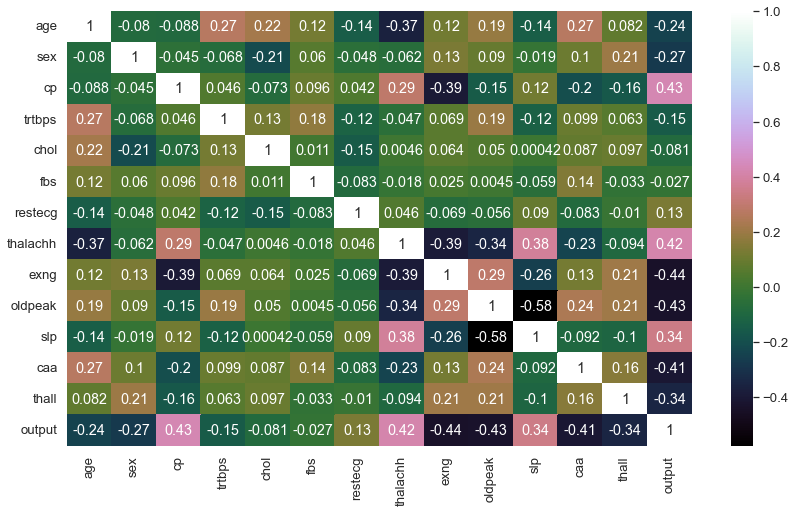

In [183]:
corr =ha1.corr()
corr.sort_values(['output'], ascending= False, inplace=True)
print(corr.output)
correlationmat = ha1.corr()
plt.figure(figsize=(14,8))
g=sns.heatmap(ha1.corr(),annot=True,cmap='cubehelix')

In [184]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial columns are : ", cat_cols)
print("The continuous columns are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial columns are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous columns are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


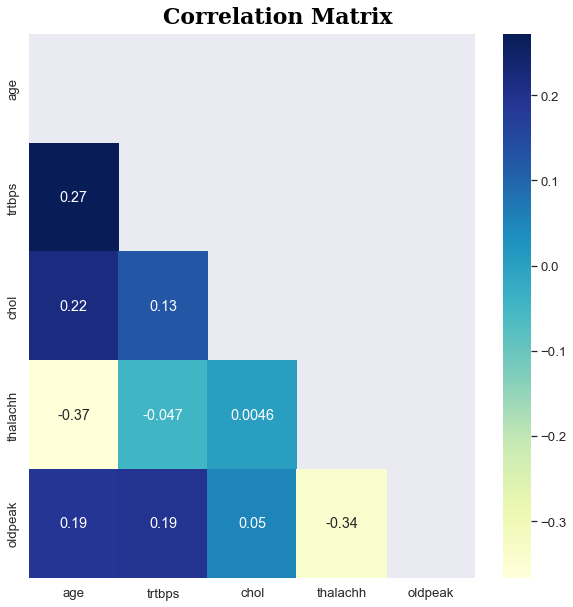

In [185]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
ha1_corr = ha1[con_cols].corr()
sns.heatmap(ha1_corr,mask=np.triu(np.ones_like(ha1_corr)),annot=True,cmap='YlGnBu')
plt.show()

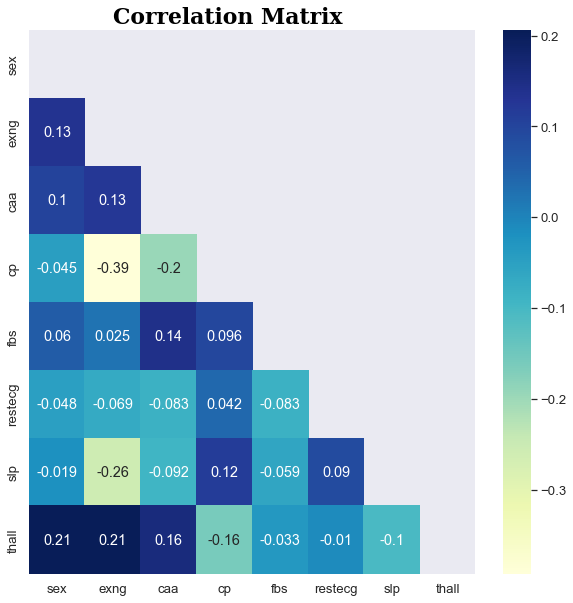

In [186]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
ha1_corr = ha1[cat_cols].corr()
sns.heatmap(ha1_corr,mask=np.triu(np.ones_like(ha1_corr)),annot=True,cmap='YlGnBu')
plt.show()

In [187]:
#!pip install pandas-profiling

In [188]:
#profile.to_file(output_file="ha1.pdf")

In [189]:
#!pip install klib

In [190]:
ha1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,46.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [191]:
import klib

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

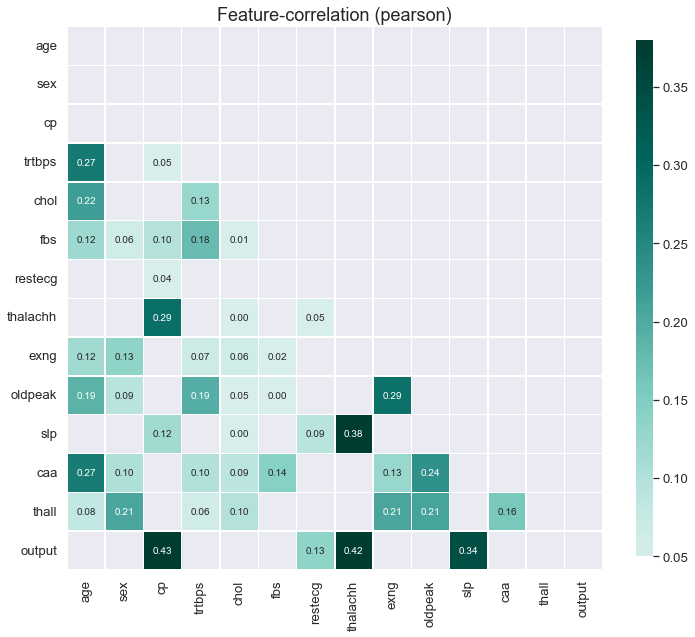

In [192]:
klib.corr_plot(ha1, split='pos') # displaying only positive correlations, other settings include threshold, cmap...

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

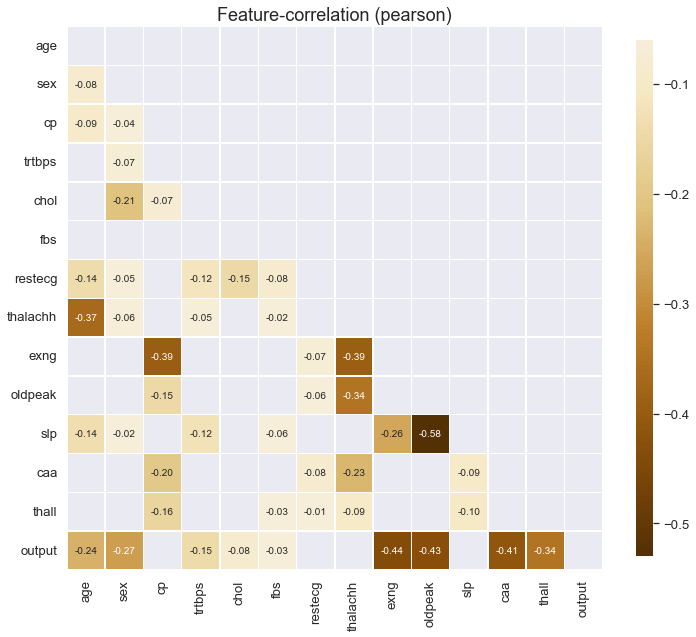

In [193]:
klib.corr_plot(ha1, split='neg') # displaying only negative correlations

### Outlier Check for Continous Variables using Box Plot

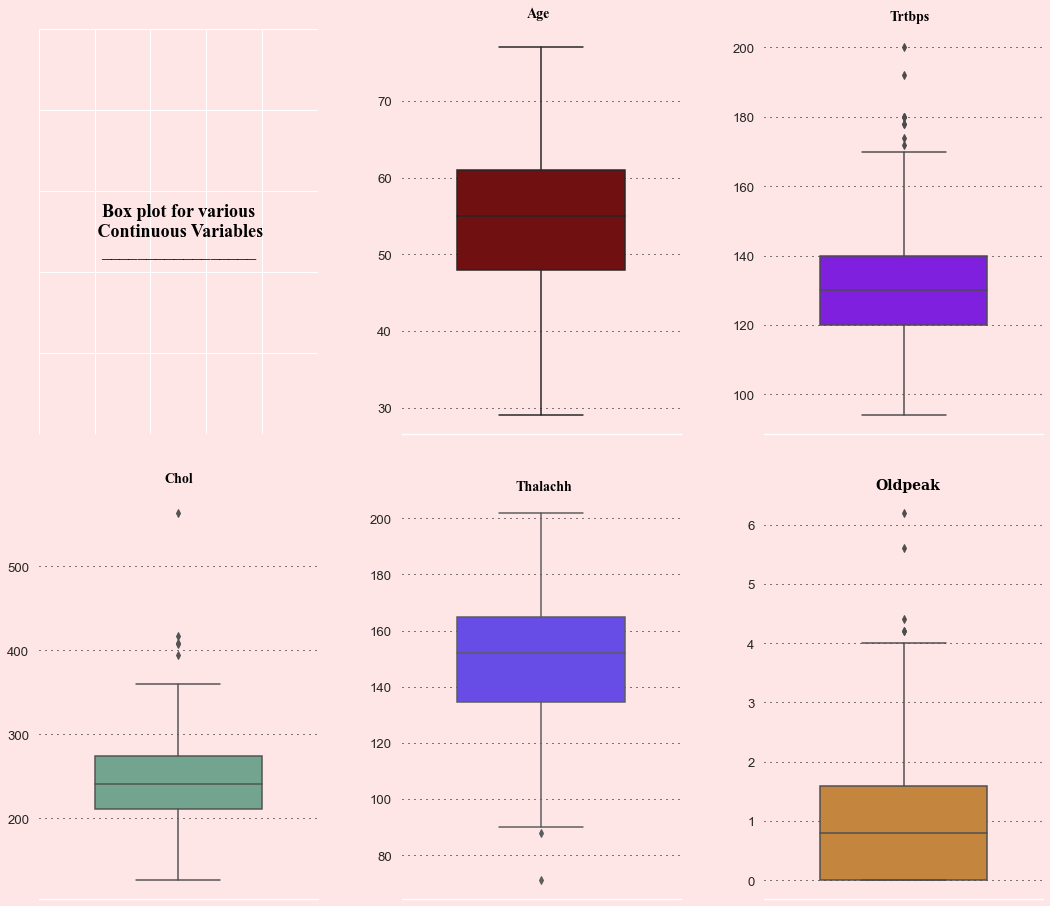

In [194]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n Continuous Variables\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='Times New Roman',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,y=ha1['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,y=ha1['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,y=ha1['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,y=ha1['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

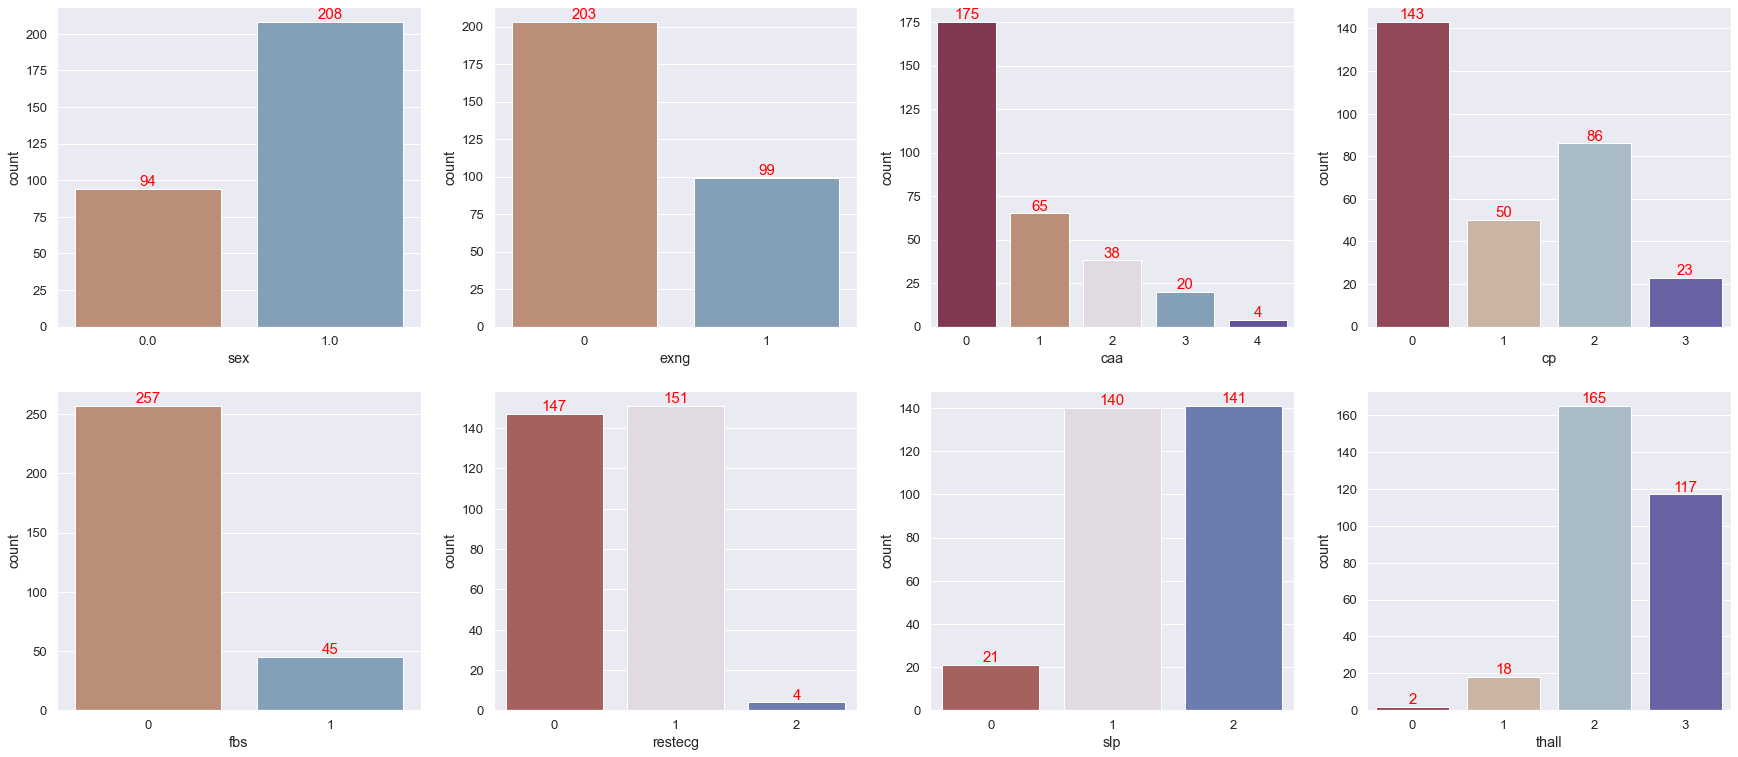

In [195]:
plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for a, feature in enumerate(cat_cols):
    plt.subplot(3, 4, a+1)
    ax=sns.countplot(data=ha1, x=feature, palette="twilight_shifted_r")
    for a in ax.patches:
       
        ax.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

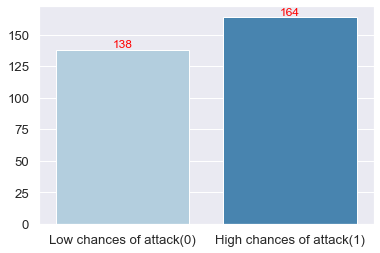

In [196]:
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')
ax1 = sns.countplot(data=ha1, x="output", palette="Blues")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])
for a in ax1.patches:
       
        ax1.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=12, color='red', ha='center', va='bottom') 

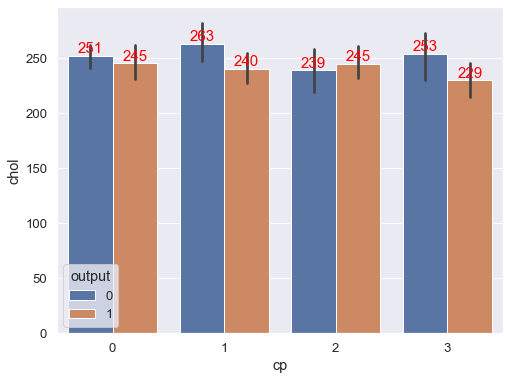

In [197]:
#data = pd.concat([ha1['chol'], ha1['cp']],ha1['output'])
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='cp', y="chol",hue="output", data=ha1)
for a in fig.patches:
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')


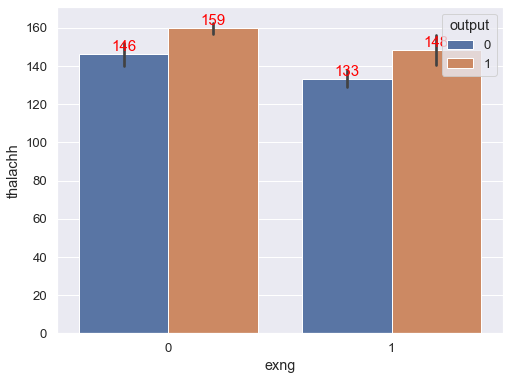

In [198]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='exng', y="thalachh",hue="output", data=ha1)

for a in fig.patches:
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

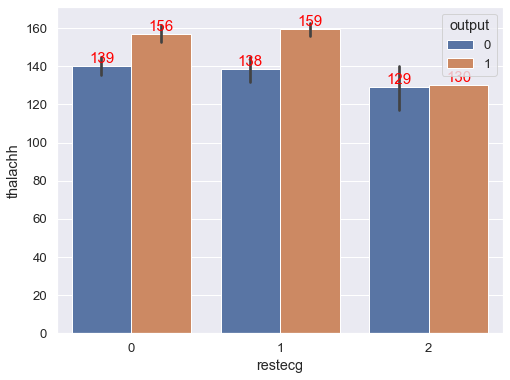

In [199]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='restecg', y="thalachh",hue="output", data=ha1)
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

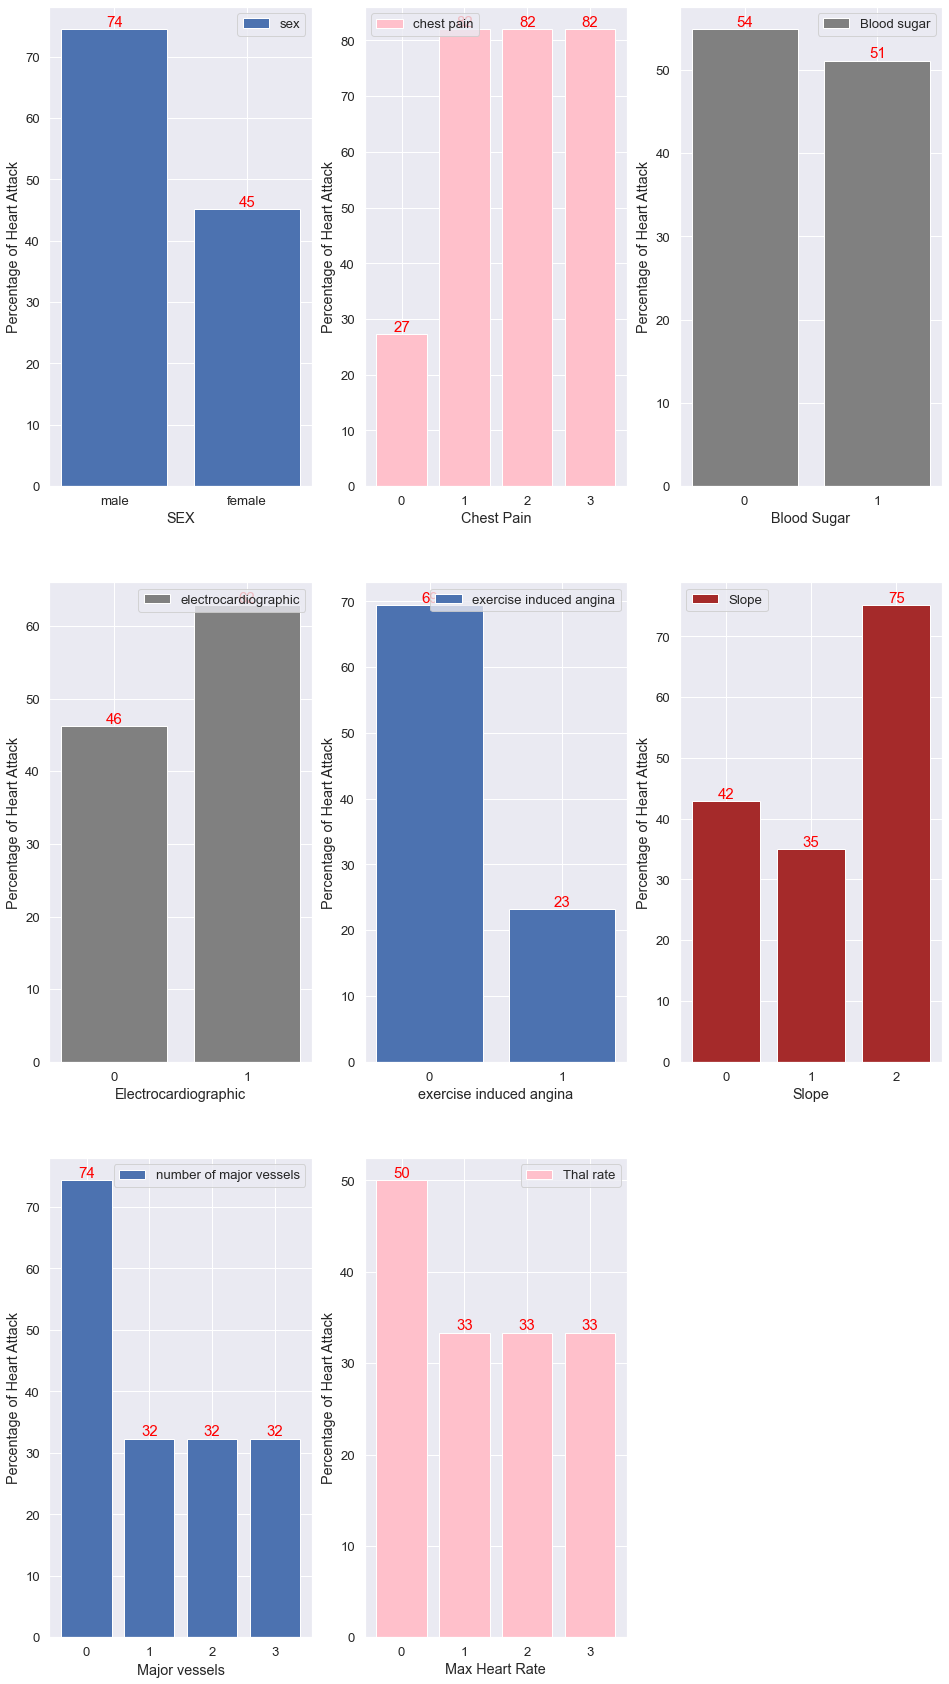

In [311]:
fig=plt.figure(figsize=(16, 30))
fig = plt.subplot(331)
name='sex'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label=name )
plt.xlabel('SEX')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(332)
name='cp'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='chest pain' , color="pink")
plt.xlabel('Chest Pain')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(333)
name='fbs'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar', color="grey" )
plt.xlabel('Blood Sugar')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(334)
name='restecg'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='electrocardiographic' , color="grey")
plt.xlabel('Electrocardiographic')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(335)
name='exng'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel('exercise induced angina')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')



fig = plt.subplot(336)
name='slp'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
     (100)*ha1[ha1[name]==2]['output'].sum()/len(ha1[ha1[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' , color="brown")
plt.xlabel('Slope')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(337)
name='caa'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel('Major vessels')
plt.ylabel('Percentage of Heart Attack')
plt.legend()
for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

fig = plt.subplot(338)
name='thall'
l = [(100)*ha1[ha1[name]==0]['output'].sum()/len(ha1[ha1[name]==0]['output']),
     (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output']),
    (100)*ha1[ha1[name]==1]['output'].sum()/len(ha1[ha1[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Thal rate', color="pink" )
plt.xlabel('Max Heart Rate')
plt.ylabel('Percentage of Heart Attack')
plt.legend()

for a in fig.patches:
       
        fig.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

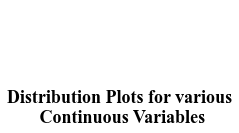

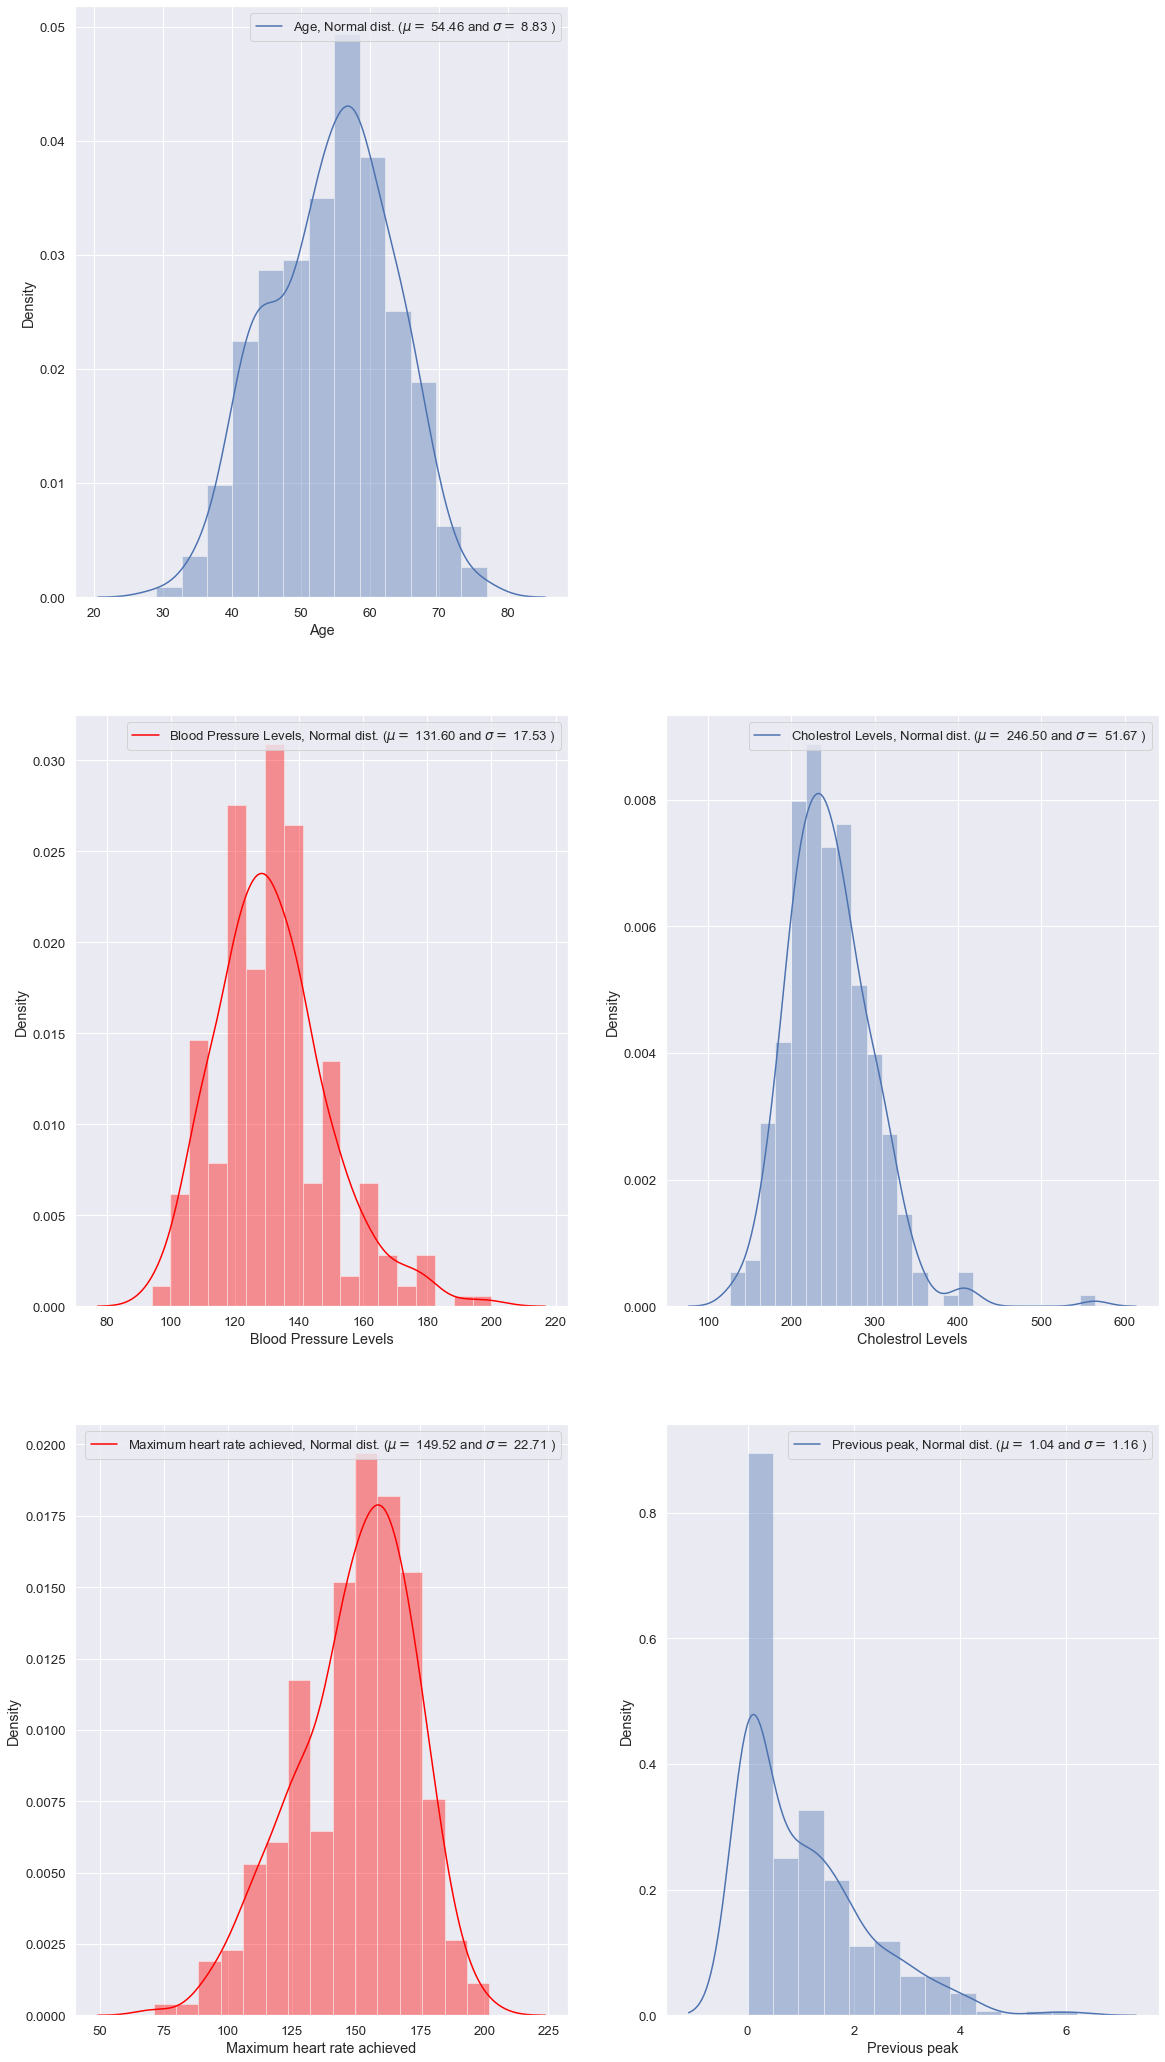

In [201]:
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import norm, skew
# Title of the plot
ax0 = plt.subplot(gs[0,0])
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.set_facecolor("white") 
ax0.text(0,0,
         'Distribution Plots for various\n Continuous Variables',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='Times New Roman',
         color="#000000")

fig=plt.figure(figsize=(30, 50))
fig = plt.subplot(432)
j = sns.distplot(ha1['age'],kde=True,label=' Age');
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['age'])
plt.xlabel('Age')
plt.legend(['Age, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


fig = plt.subplot(435)
i = sns.distplot(ha1['trtbps'], color="red",  kde= True,label='Blood Pressure')
plt.xlabel('Blood Pressure Levels')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['trtbps'])
plt.legend(['Blood Pressure Levels, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig = plt.subplot(436)
sns.distplot(ha1['chol'],kde=True,label='cholestrol')
plt.xlabel('Cholestrol Levels')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['chol'])
plt.legend(['Cholestrol Levels, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')



fig = plt.subplot(438)
h = sns.distplot(ha1['thalachh'], color="red",  kde= True,label='Maximum heart rate')
plt.xlabel('Maximum heart rate achieved')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['thalachh'])
plt.legend(['Maximum heart rate achieved, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')



fig = plt.subplot(439)
g = sns.distplot(ha1['oldpeak'],kde=True,label='Old peak')
plt.xlabel('Previous peak')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['oldpeak'])
plt.legend(['Previous peak, Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


plt.show()


Most of the people have age between 50-60,less chest pain,blood pressure between 120 to 140, cholestrol between 200-300,blodd sugar less than 120, whereas heart rate between 150-175.



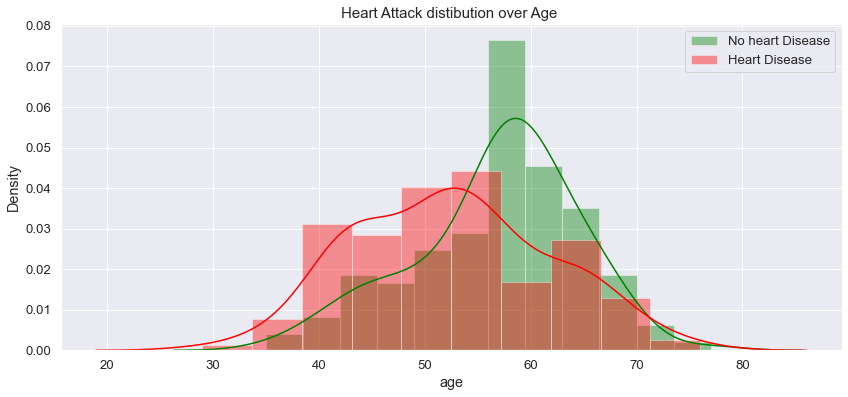

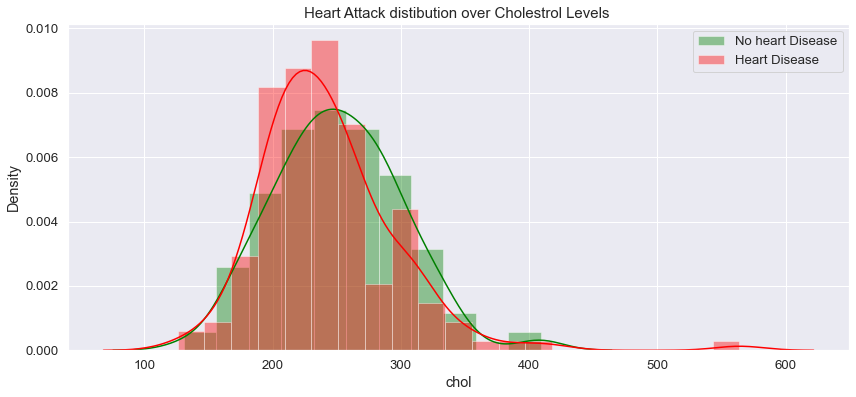

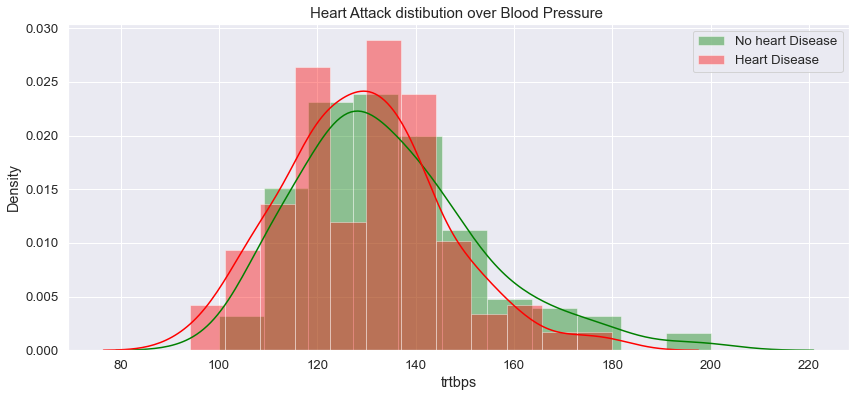

In [202]:
import plotly.figure_factory as ff
fig=plt.figure(figsize=(14, 6))
sns.distplot(ha1[ha1['output'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(ha1[ha1['output'] == 1]["age"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Age ', fontsize=15)
plt.legend()

fig=plt.figure(figsize=(14, 6))
sns.distplot(ha1[ha1['output'] == 0]["chol"], color='green',label='No heart Disease') 
sns.distplot(ha1[ha1['output'] == 1]["chol"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Cholestrol Levels ', fontsize=15)
plt.legend()

fig=plt.figure(figsize=(14, 6))
sns.distplot(ha1[ha1['output'] == 0]["trtbps"], color='green',label='No heart Disease') 
sns.distplot(ha1[ha1['output'] == 1]["trtbps"], color='red',label='Heart Disease')
plt.title('Heart Attack distibution over Blood Pressure ', fontsize=15)
plt.legend()


In [203]:
skewness = ha1[con_cols].apply(lambda x: skew(x.dropna()))
skewness

age        -0.162566
trtbps      0.712978
chol        1.141626
thalachh   -0.534326
oldpeak     1.259875
dtype: float64

In [204]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous = ["age","trtbps","chol","thalachh","oldpeak"]

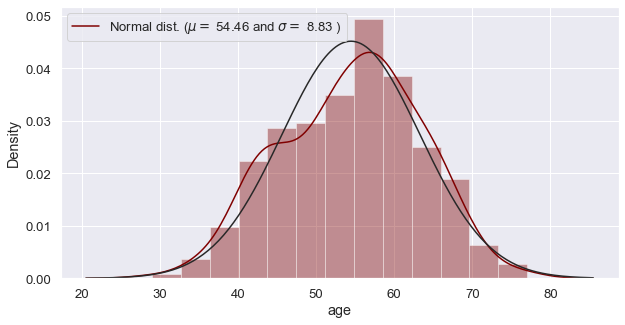

In [205]:
plt.figure(figsize=(10, 5))
#ha1['age'] = np.log1p(ha1.iloc[:len(ha1)]['age'])
sns.distplot(ha1.iloc[:len(ha1)]['age'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['age'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

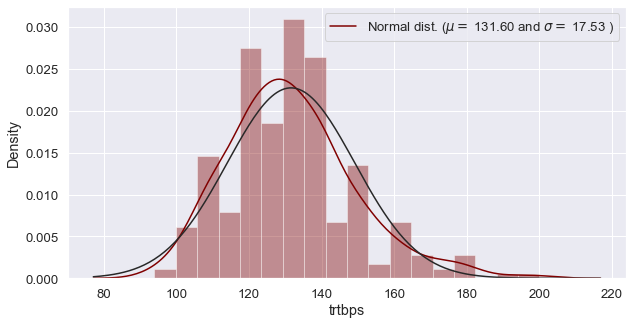

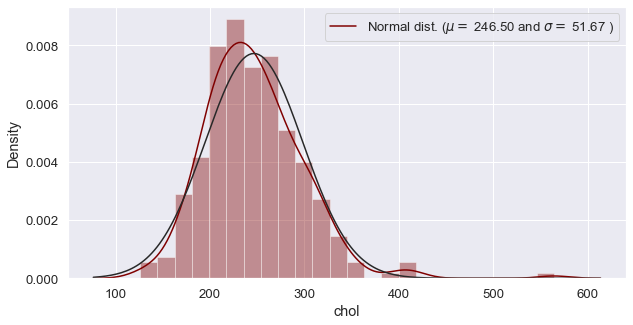

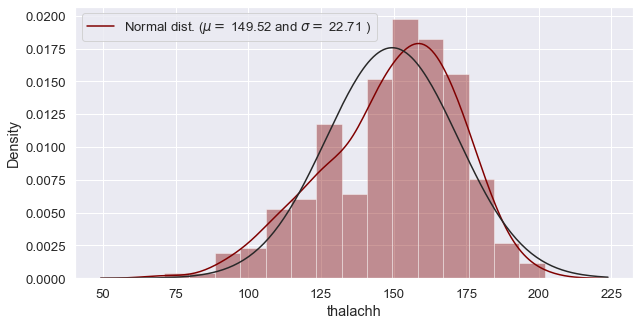

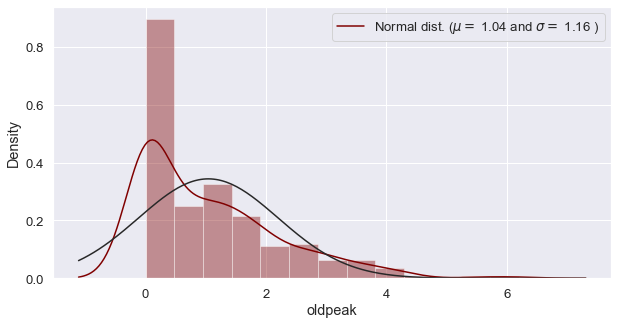

In [206]:
plt.figure(figsize=(10, 5))
#ha1['trtbps'] = np.log1p(ha1.iloc[:len(ha1)]['trtbps'])
sns.distplot(ha1.iloc[:len(ha1)]['trtbps'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['trtbps'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.figure(figsize=(10, 5))
#ha1['chol'] = np.log1p(ha1.iloc[:len(ha1)]['chol'])
sns.distplot(ha1.iloc[:len(ha1)]['chol'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['chol'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.figure(figsize=(10, 5))
#ha1['thalachh'] = np.log1p(ha1.iloc[:len(ha1)]['thalachh'])
sns.distplot(ha1.iloc[:len(ha1)]['thalachh'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['thalachh'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.figure(figsize=(10, 5))
#ha1['oldpeak'] = np.log1p(ha1.iloc[:len(ha1)]['oldpeak'])
sns.distplot(ha1.iloc[:len(ha1)]['oldpeak'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(ha1.iloc[:len(ha1)]['oldpeak'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

In [207]:
#ha1= pd.get_dummies(ha1, columns = categorical, drop_first = True)

In [208]:
ha1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,46.0,0.0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163.0,1,0.6,2,0,2,1


In [209]:
ha1.shape

(302, 14)

In [210]:
ha2 = ha1.copy()

In [211]:
X = ha2.drop(['output'],axis=1)
y = ha2[['output']]


In [212]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [213]:
def print_metrics(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    accuracy = metrics.accuracy_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('Accuracy:', accuracy)

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [217]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred_LR = log_reg.predict(X_test)

test_pred_LR = log_reg.predict(X_test)
train_pred_LR = log_reg.predict(X_train)

In [218]:
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_LR)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_LR)

Test set evaluation:

MAE: 0.16393442622950818
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Accuracy: 0.8360655737704918
******************************
Train set evaluation:

MAE: 0.12863070539419086
MSE: 0.12863070539419086
RMSE: 0.35865123085553585
Accuracy: 0.8713692946058091


In [245]:
print(classification_report(y_test, test_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## SVM

In [219]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

In [220]:
test_pred_svm = clf.predict(X_test)
train_pred_svm = clf.predict(X_train)
#print("The test accuracy score of SVM is ", accuracy_score(y_test, test_pred_svm))

In [221]:
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_svm)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_svm)

Test set evaluation:

MAE: 0.16393442622950818
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Accuracy: 0.8360655737704918
******************************
Train set evaluation:

MAE: 0.11618257261410789
MSE: 0.11618257261410789
RMSE: 0.3408556477661884
Accuracy: 0.8838174273858921


## KNN

In [236]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
train_pred_knn = knn_classifier.predict(X_train)
test_pred_knn = knn_classifier.predict(X_test)
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_knn)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_knn)

Test set evaluation:

MAE: 0.08196721311475409
MSE: 0.08196721311475409
RMSE: 0.2862991671569341
Accuracy: 0.9180327868852459
******************************
Train set evaluation:

MAE: 0.14107883817427386
MSE: 0.14107883817427386
RMSE: 0.3756046301289081
Accuracy: 0.8589211618257261


In [264]:
print(knn_classifier.predict(sc.transform([[33,1,3,180,280,1,0,180,0,1.5,1,2,3]])))

[1]


In [247]:
print(classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [265]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_pred_knn)
print(cm)
accuracy_score(y_test, test_pred_knn)

[[28  1]
 [ 4 28]]


0.9180327868852459

In [223]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_rf)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_rf)

Test set evaluation:

MAE: 0.11475409836065574
MSE: 0.11475409836065574
RMSE: 0.3387537429470791
Accuracy: 0.8852459016393442
******************************
Train set evaluation:

MAE: 0.0
MSE: 0.0
RMSE: 0.0
Accuracy: 1.0


In [298]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [299]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [300]:
best_grid

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=5,
                       min_samples_split=12)

In [301]:
rf_model = RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=5,
                       min_samples_split=12)
rf_model.fit(X_train, y_train)
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_rf)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_rf)

Test set evaluation:

MAE: 0.13114754098360656
MSE: 0.13114754098360656
RMSE: 0.3621429841700741
Accuracy: 0.8688524590163934
******************************
Train set evaluation:

MAE: 0.0995850622406639
MSE: 0.0995850622406639
RMSE: 0.3155710098229302
Accuracy: 0.9004149377593361


In [224]:
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
train_pred_ada = ada_classifier.predict(X_train)
test_pred_ada = ada_classifier.predict(X_test)
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_ada)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_ada)

Test set evaluation:

MAE: 0.19672131147540983
MSE: 0.19672131147540983
RMSE: 0.4435327625727437
Accuracy: 0.8032786885245902
******************************
Train set evaluation:

MAE: 0.07053941908713693
MSE: 0.07053941908713693
RMSE: 0.26559258100921596
Accuracy: 0.9294605809128631


## Gradient Boosting


In [293]:
gbt = GradientBoostingClassifier()
gbt.fit(X_train,y_train)
train_pred_gbt = gbt.predict(X_train)
test_pred_gbt = gbt.predict(X_test)
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_gbt)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_gbt)

Test set evaluation:

MAE: 0.16393442622950818
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Accuracy: 0.8360655737704918
******************************
Train set evaluation:

MAE: 0.0
MSE: 0.0
RMSE: 0.0
Accuracy: 1.0


In [294]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,300,350,400,500],
    "max_depth":[1,3,5,7,9],
    "max_features":['auto','sqrt','log2'],
    "subsample":[0.5,0.6,0.7,0.8,0.9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [295]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)

## Do not run this

In [112]:
%%time
#cv.fit(X_train,y_train)

Wall time: 1h 21min 53s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 50, 250, 300, 350, 400, 500],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 50, 250, 300, 350, 400, 500],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [113]:
%%time
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    print('Mean Score:', mean_score)
    std_score = results.cv_results_['std_test_score']
    print('Std Score:', std_score)
    

Wall time: 0 ns


In [114]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 250, 'subsample': 0.9}


Mean Score: [0.54770408 0.54770408 0.54770408 ... 0.70535714 0.61836735 0.63494898]
Std Score: [0.00823733 0.00823733 0.00823733 ... 0.0518575  0.06720302 0.05909809]


In [296]:

gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=3,subsample=0.9,max_features='sqrt',
                                 random_state=42, learning_rate=0.01)
gbt.fit(X_train,y_train)
train_pred_gbt = gbt.predict(X_train)
test_pred_gbt = gbt.predict(X_test)
print('Test set evaluation:\n')
print_metrics(y_test, test_pred_gbt)
print('*'*30)
print('Train set evaluation:\n')
print_metrics(y_train, train_pred_gbt)

Test set evaluation:

MAE: 0.11475409836065574
MSE: 0.11475409836065574
RMSE: 0.3387537429470791
Accuracy: 0.8852459016393442
******************************
Train set evaluation:

MAE: 0.08713692946058091
MSE: 0.08713692946058091
RMSE: 0.29518964998891967
Accuracy: 0.9128630705394191


In [279]:
print(classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [280]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_pred_gbt)
print(cm)
accuracy_score(y_test, test_pred_gbt)

[[26  3]
 [ 4 28]]


0.8852459016393442

In [281]:
print(gbt.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


In [283]:
# get importance
importance = gbt.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06275
Feature: 1, Score: 0.03807
Feature: 2, Score: 0.12976
Feature: 3, Score: 0.03234
Feature: 4, Score: 0.03909
Feature: 5, Score: 0.00279
Feature: 6, Score: 0.01068
Feature: 7, Score: 0.09972
Feature: 8, Score: 0.07390
Feature: 9, Score: 0.10424
Feature: 10, Score: 0.05338
Feature: 11, Score: 0.17560
Feature: 12, Score: 0.17768


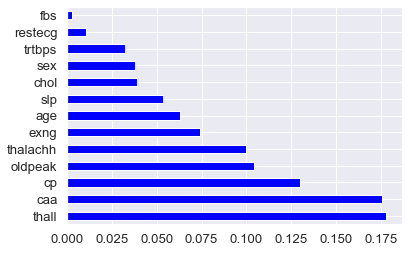

In [287]:
index= ha1.columns[:-1]
importance = pd.Series(gbt.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')
for a in fig.patches:
       
        importance.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

In [304]:
# get importance RF
importance1 = rf_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07569
Feature: 1, Score: 0.03420
Feature: 2, Score: 0.14979
Feature: 3, Score: 0.03884
Feature: 4, Score: 0.03314
Feature: 5, Score: 0.00263
Feature: 6, Score: 0.01068
Feature: 7, Score: 0.12150
Feature: 8, Score: 0.06434
Feature: 9, Score: 0.10162
Feature: 10, Score: 0.05530
Feature: 11, Score: 0.16823
Feature: 12, Score: 0.14405


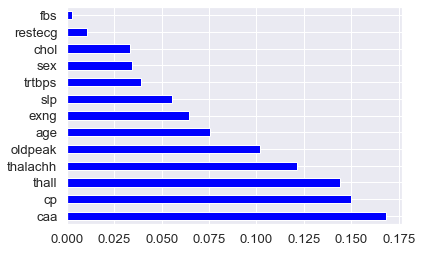

In [305]:
index= ha1.columns[:-1]
importance1 = pd.Series(rf_model.feature_importances_, index=index)
importance1.nlargest(13).plot(kind='barh', colormap='winter')
for a in fig.patches:
       
        importance.text(a.get_x() + a.get_width()/2., a.get_height(), '%d' % int(a.get_height()), 
                fontsize=15, color='red', ha='center', va='bottom')

In [306]:
print(classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [307]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_pred_rf)
print(cm)
accuracy_score(y_test, test_pred_rf)

[[24  5]
 [ 3 29]]


0.8688524590163934

In [272]:
print(classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [308]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_pred_knn)
print(cm)
accuracy_score(y_test, test_pred_knn)

[[28  1]
 [ 4 28]]


0.9180327868852459

In [273]:
print(classification_report(y_test, test_pred_gbt))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [309]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_pred_gbt)
print(cm)
accuracy_score(y_test, test_pred_gbt)

[[26  3]
 [ 4 28]]


0.8852459016393442

## Producing an ROC 

## For KNN

In [328]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [323]:
ytrain_pred_knn = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_knn[:,1])))
ytest_pred_knn = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_knn[:,1])))

KNN train roc-auc: 0.9352585487906588
KNN test roc-auc: 0.9024784482758621


In [324]:
y_pred_prob_knn = knn_classifier.predict_proba(X_test)[:,1]

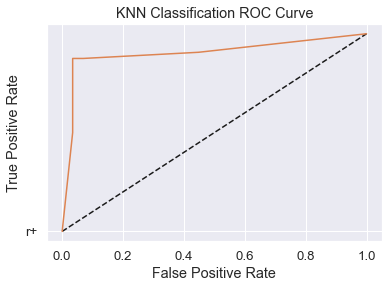

In [325]:
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob_knn)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='KNN Classification')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Classification ROC Curve")
plt.show()

## Gradient Booster

In [292]:
ytrain_pred_gbt = gbt.predict_proba(X_train)
print('gbt train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_gbt[:,1])))
ytest_pred_gbt = gbt.predict_proba(X_test)
print('gdt test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_gbt[:,1])))



gbt train roc-auc: 0.9786627745343341
gdt test roc-auc: 0.9418103448275862


In [319]:
y_pred_prob_gbt = gbt.predict_proba(X_test)[:,1]

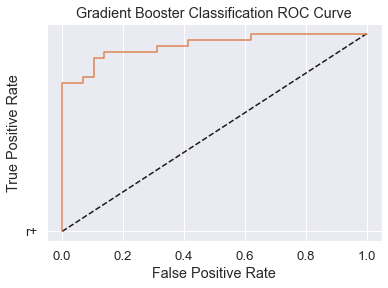

In [320]:
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob_gbt)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Gradient Booster Classification')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Booster Classification ROC Curve")
plt.show()